[*********************100%%**********************]  1 of 1 completed


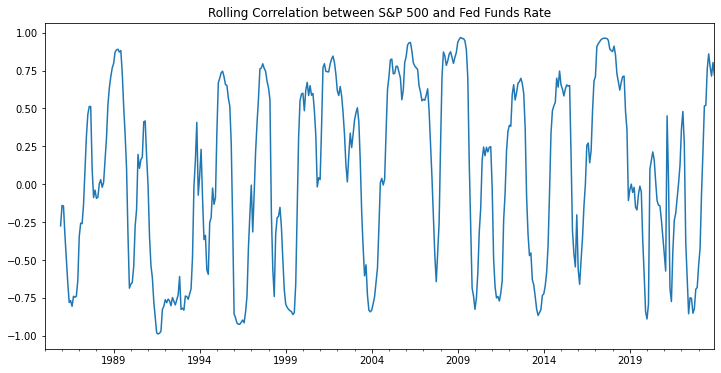

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

# Define the crises periods
crises_periods = {
    '1987 Black Monday': ('1987-08-01', '1988-02-01'),
    '1997 Asian Financial Crisis': ('1997-07-01', '1998-01-01'),
    '2000 Dotcom Bubble': ('2000-01-01', '2002-12-01'),
    '2007 Global Financial Crisis': ('2007-10-01', '2009-03-01'),
    '2020 COVID-19': ('2020-02-01', '2021-12-01')
}

# Download stock market data (e.g., S&P 500)
sp500 = yf.download('^GSPC', start='1985-01-01', end='2024-01-01')

# Download economic data (e.g., Fed Funds Rate from FRED)
fed_rate = web.DataReader('FEDFUNDS', 'fred', start='1985-01-01', end='2024-01-01')

# Preprocess the data
sp500 = sp500['Adj Close'].resample('M').last()
fed_rate = fed_rate.resample('M').last()


# Merge datasets into a single DataFrame
data = pd.DataFrame({
    'S&P 500': sp500,
    'Fed Funds Rate': fed_rate['FEDFUNDS']
}).dropna()

# Calculate rolling correlations (e.g., 12-month window)
rolling_corr = data['S&P 500'].rolling(window=12).corr(data['Fed Funds Rate'])

# Plot the rolling correlation
plt.figure(figsize=(12, 6))
rolling_corr.plot(title='Rolling Correlation between S&P 500 and Fed Funds Rate')
plt.show()


In [1]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

# Define the crises periods
crises_periods = {
    '1987 Black Monday': ('1987-08-01', '1988-02-01'),
    '1997 Asian Financial Crisis': ('1997-07-01', '1998-01-01'),
    '2000 Dotcom Bubble': ('2000-01-01', '2002-12-01'),
    '2007 Global Financial Crisis': ('2007-10-01', '2009-03-01'),
    '2020 COVID-19': ('2020-02-01', '2021-12-01')
}


# Download stock market data (e.g., S&P 500)
sp500 = yf.download('^GSPC', start='1985-01-01', end='2024-01-01')['Adj Close']

# Download economic data (e.g., Fed Funds Rate from FRED)
try:
    # Attempt to fetch Fed Funds Rate data
    fed_rate = web.DataReader('FEDFUNDS', 'fred', start='1985-01-01', end='2024-01-01')
    # Check the first few rows of the retrieved data
    print(fed_rate.head())
except Exception as e:
    print(f"Error fetching Fed Funds Rate data: {e}")
    fed_rate = pd.DataFrame()  # Set an empty DataFrame

# Ensure that fed_rate has valid data before proceeding
if fed_rate.empty:
    print("Fed Funds Rate data is not available or could not be retrieved.")
else:
    # Preprocess the data
    sp500 = sp500.resample('M').last().squeeze()  # Resample to monthly data and convert to Series
    fed_rate = fed_rate.resample('M').last().squeeze()  # Resample to monthly data and convert to Series

    # Combine the data into a single DataFrame and drop NaN values
    data = pd.DataFrame({
        'S&P 500': sp500,
        'Fed Funds Rate': fed_rate
    }).dropna()

    # Check the head of the data to ensure it's correct
    print(data.head())

    # Analyze each crisis period
    for crisis_name, (start_date, end_date) in crises_periods.items():
        # Filter the data for the current crisis period
        crisis_data = data[(data.index >= start_date) & (data.index <= end_date)]
        
        # Print a brief summary for each crisis
        print(f"Analysis for {crisis_name}:")
        print(crisis_data.head(), "\n")




[*********************100%%**********************]  1 of 1 completed


            FEDFUNDS
DATE                
1985-01-01      8.35
1985-02-01      8.50
1985-03-01      8.58
1985-04-01      8.27
1985-05-01      7.97
               S&P 500  Fed Funds Rate
1985-01-31  179.630005            8.35
1985-02-28  181.179993            8.50
1985-03-31  180.660004            8.58
1985-04-30  179.830002            8.27
1985-05-31  189.550003            7.97
Analysis for 1987 Black Monday:
               S&P 500  Fed Funds Rate
1987-08-31  329.799988            6.73
1987-09-30  321.829987            7.22
1987-10-31  251.789993            7.29
1987-11-30  230.300003            6.69
1987-12-31  247.080002            6.77 

Analysis for 1997 Asian Financial Crisis:
               S&P 500  Fed Funds Rate
1997-07-31  954.309998            5.52
1997-08-31  899.469971            5.54
1997-09-30  947.280029            5.54
1997-10-31  914.619995            5.50
1997-11-30  955.400024            5.52 

Analysis for 2000 Dotcom Bubble:
                S&P 500  Fed Funds Rate


In [3]:
data

,S&P 500,Fed Funds Rate
1985-01-31,179.630005,8.35
1985-02-28,181.179993,8.50
1985-03-31,180.660004,8.58
1985-04-30,179.830002,8.27
1985-05-31,189.550003,7.97
...,...,...
2023-08-31,4507.660156,5.33
2023-09-30,4288.049805,5.33
2023-10-31,4193.799805,5.33
2023-11-30,4567.799805,5.33


In [4]:
data.head()

,S&P 500,Fed Funds Rate
1985-01-31,179.630005,8.35
1985-02-28,181.179993,8.50
1985-03-31,180.660004,8.58
1985-04-30,179.830002,8.27
1985-05-31,189.550003,7.97


In [11]:
import pandas_datareader.data as web

try:
    # Test with a different series code, such as 'UNRATE' (U.S. Unemployment Rate)
    test_data = web.DataReader('UNRATE', 'fred', start='1985-01-01', end='2023-01-01')
    print(test_data.head())
except Exception as e:
    print(f"Error fetching data: {e}")


            UNRATE
DATE              
1985-01-01     7.3
1985-02-01     7.2
1985-03-01     7.2
1985-04-01     7.3
1985-05-01     7.2


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

def perform_regression(X, y):
    # Add a constant to the independent variable for the regression intercept
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    
    # Extract results
    slope = model.params[1]  # Coefficient for 'Fed Funds Rate'
    intercept = model.params[0]  # Intercept
    r_squared = model.rsquared
    
    return model, slope, intercept, r_squared


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

def analyze_crisis(crisis, crisis_data):
    # Assuming crisis_data is a DataFrame with 'S&P 500' and 'Fed Funds Rate' columns
    
    # Descriptive statistics
    sp500_mean = crisis_data['S&P 500'].mean()
    fed_rate_mean = crisis_data['Fed Funds Rate'].mean()
    
    print(f"Analysis of {crisis}:")
    print(f"Average S&P 500: {sp500_mean:.2f}")
    print(f"Average Fed Funds Rate: {fed_rate_mean:.2f}")
    
    # Correlation analysis
    correlation, p_value = pearsonr(crisis_data['Fed Funds Rate'], crisis_data['S&P 500'])
    print(f"Correlation between S&P 500 and Fed Funds Rate: {correlation:.2f} (p-value: {p_value:.2f})")
    
    # Regression analysis
    X_crisis = crisis_data['Fed Funds Rate'].values.reshape(-1, 1)
    y_crisis = crisis_data['S&P 500']
    model, slope, intercept, r_squared = perform_regression(X_crisis, y_crisis)
    
    # Print regression results
    print(f"Regression Analysis for {crisis}:")
    print(f"Slope = {slope:.2f}, Intercept = {intercept:.2f}, R² = {r_squared:.2f}")
    
    # Time series plot
    plt.figure(figsize=(14, 7))
    plt.plot(crisis_data.index, crisis_data['S&P 500'], label='S&P 500')
    plt.plot(crisis_data.index, crisis_data['Fed Funds Rate'], label='Fed Funds Rate', linestyle='--')
    plt.title(f"S&P 500 and Fed Funds Rate During {crisis}")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Summary insights
    print(f"During the {crisis}, the S&P 500 and Fed Funds Rate exhibited a correlation of {correlation:.2f}.")
    if p_value < 0.05:
        print(f"This suggests a statistically significant relationship.")
    else:
        print(f"The relationship was not statistically significant.")
    
    print("-" * 50)

    return model, slope, intercept, r_squared


Analysis of 1987 Black Monday:
Average S&P 500: 272.98
Average Fed Funds Rate: 6.92
Correlation between S&P 500 and Fed Funds Rate: 0.20 (p-value: 0.70)
Regression Analysis for 1987 Black Monday:
Slope = 32.19, Intercept = 50.19, R² = 0.04


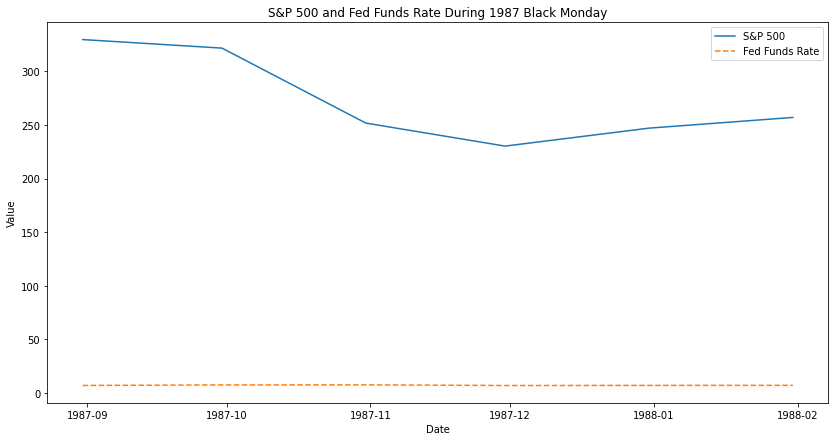

During the 1987 Black Monday, the S&P 500 and Fed Funds Rate exhibited a correlation of 0.20.
The relationship was not statistically significant.
--------------------------------------------------
1987 Black Monday: Slope = 32.19, Intercept = 50.19, R² = 0.04
Analysis of 1997 Asian Financial Crisis:
Average S&P 500: 940.25
Average Fed Funds Rate: 5.52
Correlation between S&P 500 and Fed Funds Rate: -0.31 (p-value: 0.54)
Regression Analysis for 1997 Asian Financial Crisis:
Slope = -478.75, Intercept = 3582.95, R² = 0.10


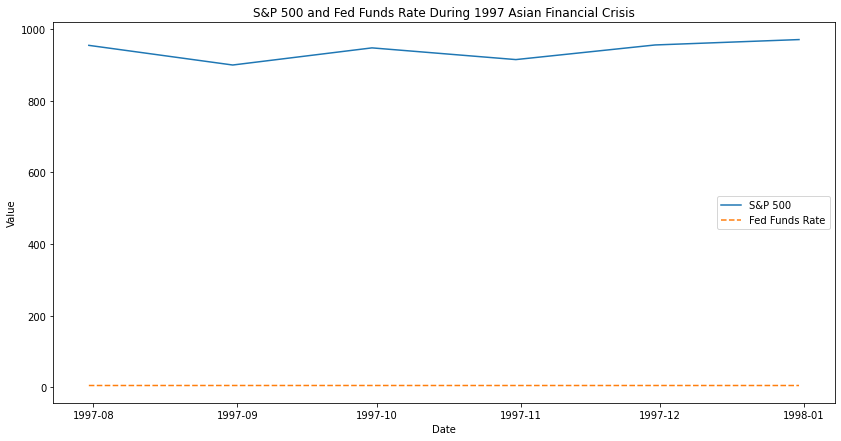

During the 1997 Asian Financial Crisis, the S&P 500 and Fed Funds Rate exhibited a correlation of -0.31.
The relationship was not statistically significant.
--------------------------------------------------
1997 Asian Financial Crisis: Slope = -478.75, Intercept = 3582.95, R² = 0.10
Analysis of 2000 Dotcom Bubble:
Average S&P 500: 1207.11
Average Fed Funds Rate: 4.01
Correlation between S&P 500 and Fed Funds Rate: 0.90 (p-value: 0.00)
Regression Analysis for 2000 Dotcom Bubble:
Slope = 85.85, Intercept = 863.14, R² = 0.80


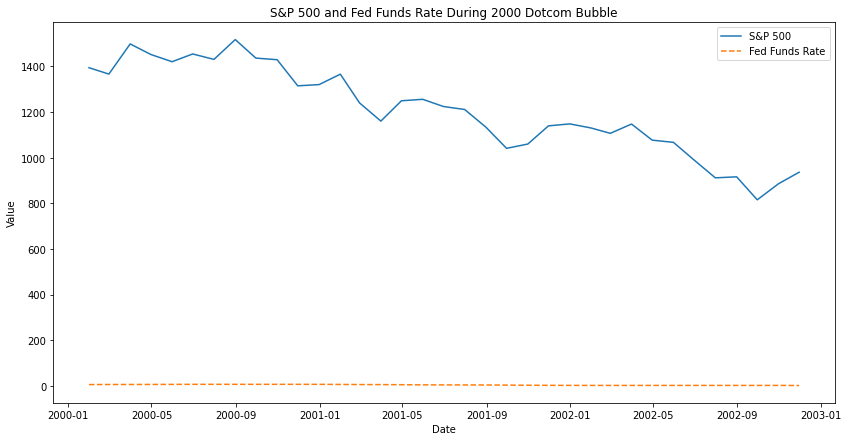

During the 2000 Dotcom Bubble, the S&P 500 and Fed Funds Rate exhibited a correlation of 0.90.
This suggests a statistically significant relationship.
--------------------------------------------------
2000 Dotcom Bubble: Slope = 85.85, Intercept = 863.14, R² = 0.80
Analysis of 2007 Global Financial Crisis:
Average S&P 500: 1214.27
Average Fed Funds Rate: 2.18
Correlation between S&P 500 and Fed Funds Rate: 0.91 (p-value: 0.00)
Regression Analysis for 2007 Global Financial Crisis:
Slope = 151.28, Intercept = 885.10, R² = 0.84


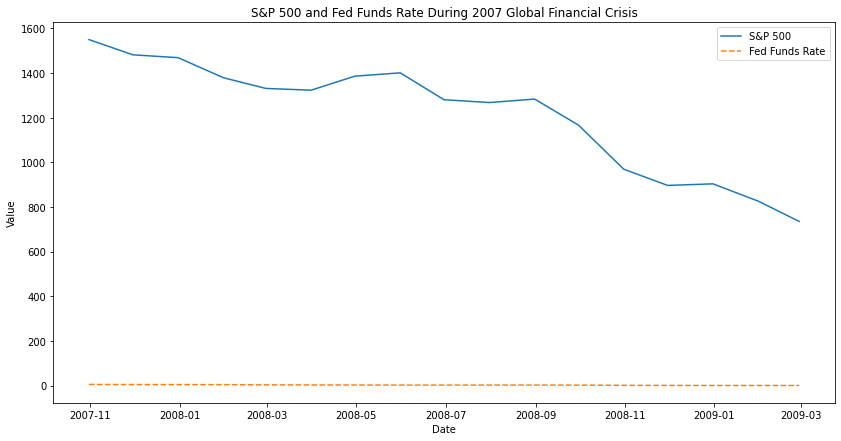

During the 2007 Global Financial Crisis, the S&P 500 and Fed Funds Rate exhibited a correlation of 0.91.
This suggests a statistically significant relationship.
--------------------------------------------------
2007 Global Financial Crisis: Slope = 151.28, Intercept = 885.10, R² = 0.84
Analysis of 2020 COVID-19:
Average S&P 500: 3725.31
Average Fed Funds Rate: 0.17
Correlation between S&P 500 and Fed Funds Rate: -0.41 (p-value: 0.06)
Regression Analysis for 2020 COVID-19:
Slope = -745.26, Intercept = 3855.39, R² = 0.17


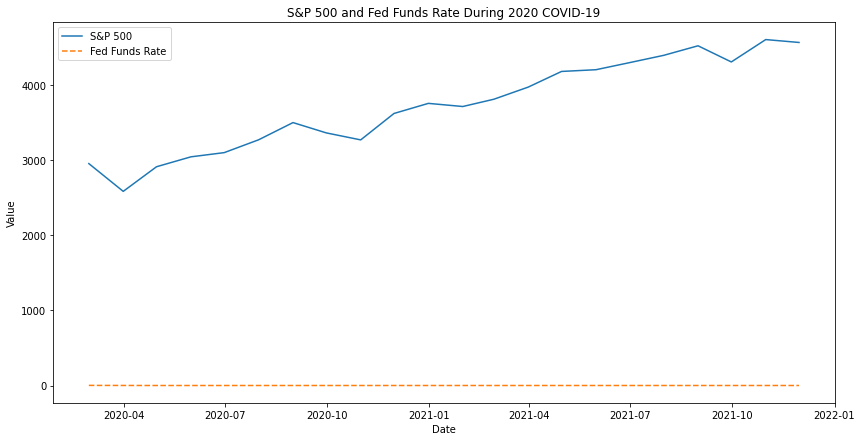

During the 2020 COVID-19, the S&P 500 and Fed Funds Rate exhibited a correlation of -0.41.
The relationship was not statistically significant.
--------------------------------------------------
2020 COVID-19: Slope = -745.26, Intercept = 3855.39, R² = 0.17


In [14]:
for crisis_name, (start_date, end_date) in crises_periods.items():
    # Convert start_date and end_date to datetime if necessary
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Filter the data for the current crisis period using index
    crisis_data = data[(data.index >= start_date) & (data.index <= end_date)]
    
    # Extract the relevant columns
    X_crisis = crisis_data['Fed Funds Rate']
    y_crisis = crisis_data['S&P 500']

    # Perform the regression analysis
    model, slope, intercept, r_squared = analyze_crisis(crisis_name, crisis_data)
    
    # Print results
    print(f"{crisis_name}: Slope = {slope:.2f}, Intercept = {intercept:.2f}, R² = {r_squared:.2f}")





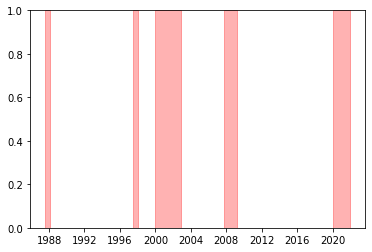

In [15]:
for crisis, (start_date, end_date) in crises_periods.items():
    plt.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='red', alpha=0.3, label=crisis)


In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def Perform_regression(X_crisis, y_crisis, crisis_name):
    # Reshape X_crisis if necessary
    if len(X_crisis.shape) == 1:
        X_crisis = X_crisis.values.reshape(-1, 1)

    # Initialize and fit the regression model
    model = LinearRegression()
    model.fit(X_crisis, y_crisis)

    # Predict y values
    y_pred = model.predict(X_crisis)

    # Get regression coefficients
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X_crisis, y_crisis)

    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X_crisis, y_crisis, color='blue', label='Data Points')
    plt.plot(X_crisis, y_pred, color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}')
    plt.title(f'Regression of S&P 500 on Fed Funds Rate during {crisis_name}')
    plt.xlabel('Fed Funds Rate')
    plt.ylabel('S&P 500')
    plt.legend()
    plt.show()

    # Return the model and relevant statistics
    return model, slope, intercept, r_squared


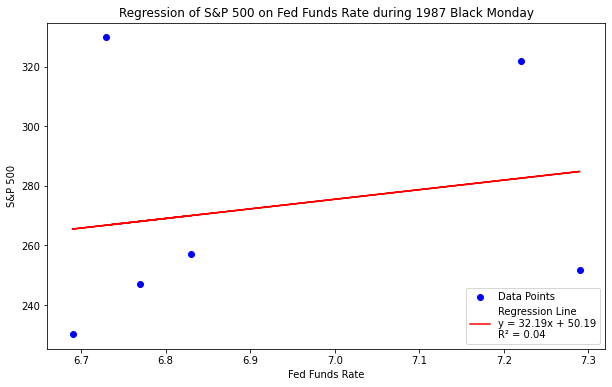

1987 Black Monday: Slope = 32.19, Intercept = 50.19, R² = 0.04


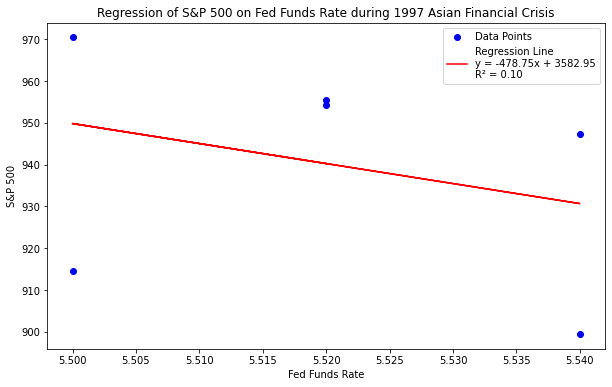

1997 Asian Financial Crisis: Slope = -478.75, Intercept = 3582.95, R² = 0.10


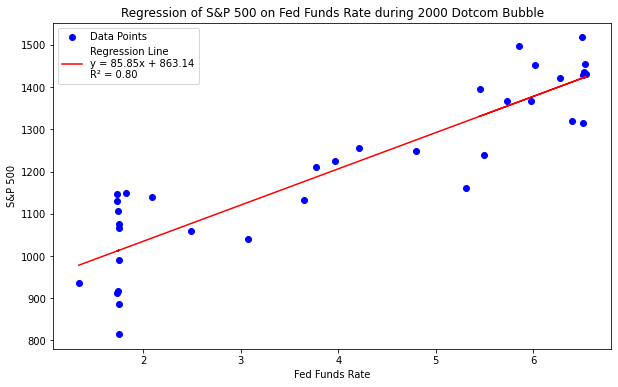

2000 Dotcom Bubble: Slope = 85.85, Intercept = 863.14, R² = 0.80


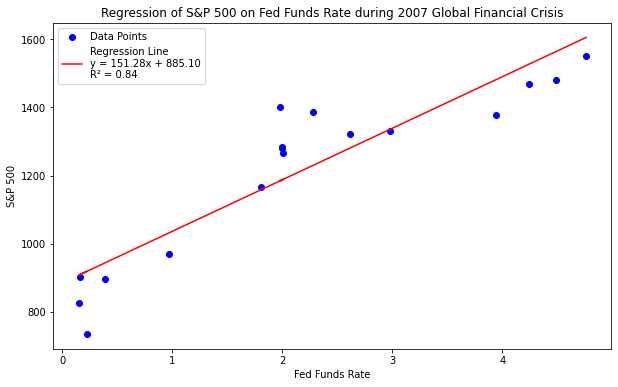

2007 Global Financial Crisis: Slope = 151.28, Intercept = 885.10, R² = 0.84


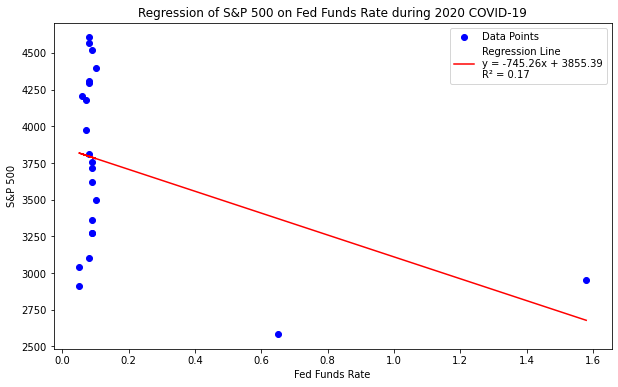

2020 COVID-19: Slope = -745.26, Intercept = 3855.39, R² = 0.17


In [17]:
import pandas as pd

# Assuming 'data' DataFrame is correctly set up with a DateTimeIndex
for crisis_name, (start_date, end_date) in crises_periods.items():
    # Convert start_date and end_date to datetime if necessary
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Filter the data for the current crisis period
    crisis_data = data[(data.index >= start_date) & (data.index <= end_date)]
    
    # Extract the relevant columns
    X_crisis = crisis_data['Fed Funds Rate']
    y_crisis = crisis_data['S&P 500']

    # Perform the regression analysis
    model, slope, intercept, r_squared = Perform_regression(X_crisis, y_crisis, crisis_name)
    
    # Print results
    print(f"{crisis_name}: Slope = {slope:.2f}, Intercept = {intercept:.2f}, R² = {r_squared:.2f}")


                            OLS Regression Results                            
Dep. Variable:                S&P 500   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           2.53e-31
Time:                        12:20:39   Log-Likelihood:                -3878.6
No. Observations:                 468   AIC:                             7761.
Df Residuals:                     466   BIC:                             7770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2104.0591     70.490     29.

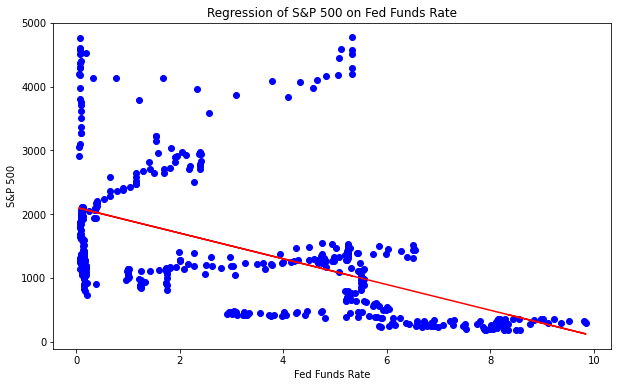

In [18]:
import statsmodels.api as sm

# Prepare data for regression
X = data['Fed Funds Rate']
X = sm.add_constant(X)  # Add constant term for intercept
y = data['S&P 500']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

# Plotting the regression
plt.figure(figsize=(10, 6))
plt.scatter(X['Fed Funds Rate'], y, color='blue')
plt.plot(X['Fed Funds Rate'], model.predict(X), color='red')
plt.title('Regression of S&P 500 on Fed Funds Rate')
plt.xlabel('Fed Funds Rate')
plt.ylabel('S&P 500')
plt.show()


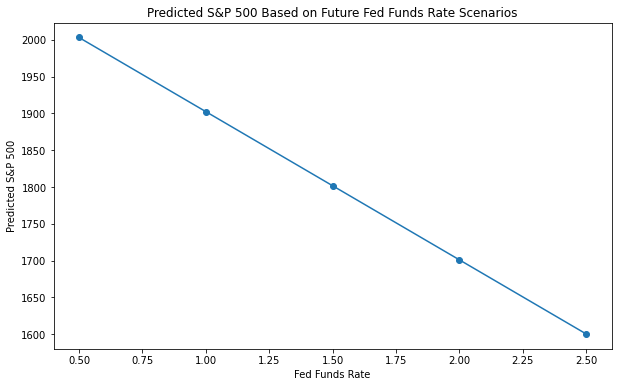

In [19]:
# Forecast using the regression model (e.g., future Fed rate scenario)
future_fed_rate = pd.Series([0.5, 1.0, 1.5, 2.0, 2.5], name='Fed Funds Rate')
future_fed_rate = sm.add_constant(future_fed_rate)

# Predict S&P 500 based on different Fed rate scenarios
predicted_sp500 = model.predict(future_fed_rate)

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(future_fed_rate['Fed Funds Rate'], predicted_sp500, marker='o')
plt.title('Predicted S&P 500 Based on Future Fed Funds Rate Scenarios')
plt.xlabel('Fed Funds Rate')
plt.ylabel('Predicted S&P 500')
plt.show()


In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

# Prepare training and testing data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [21]:
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Use 60 days (or time steps)
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape the input data to be 3D [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
313/313 [==============================] - 8s 17ms/step - loss: 0.0022
Epoch 2/10
313/313 [==============================] - 5s 17ms/step - loss: 0.0014
Epoch 3/10
313/313 [==============================] - 5s 16ms/step - loss: 8.2899e-04
Epoch 4/10
313/313 [==============================] - 5s 17ms/step - loss: 7.3066e-04
Epoch 5/10
313/313 [==============================] - 5s 17ms/step - loss: 7.6680e-04
Epoch 6/10
313/313 [==============================] - 5s 17ms/step - loss: 6.3097e-04
Epoch 7/10
313/313 [==============================] - 5s 16ms/step - loss: 6.0708e-04
Epoch 8/10
313/313 [==============================] - 5s 16ms/step - loss: 6.7399e-04
Epoch 9/10
313/313 [==============================] - 5s 16ms/step - loss: 6.0707e-04
Epoch 10/10
313/313 [==============================] - 5s 16ms/step - loss: 5.8186e-04


Epoch 1/10
313/313 [==============================] - 8s 16ms/step - loss: 0.0152
Epoch 2/10
313/313 [==============================] - 5s 16ms/step - loss: 0.0063
Epoch 3/10
313/313 [==============================] - 5s 16ms/step - loss: 0.0052
Epoch 4/10
313/313 [==============================] - 5s 16ms/step - loss: 0.0050
Epoch 5/10
313/313 [==============================] - 5s 16ms/step - loss: 0.0042
Epoch 6/10
313/313 [==============================] - 5s 15ms/step - loss: 0.0035
Epoch 7/10
313/313 [==============================] - 5s 15ms/step - loss: 0.0038
Epoch 8/10
313/313 [==============================] - 5s 15ms/step - loss: 0.0037
Epoch 9/10
313/313 [==============================] - 5s 17ms/step - loss: 0.0027
Epoch 10/10
2/2 [==============================] - 1s 0s/step


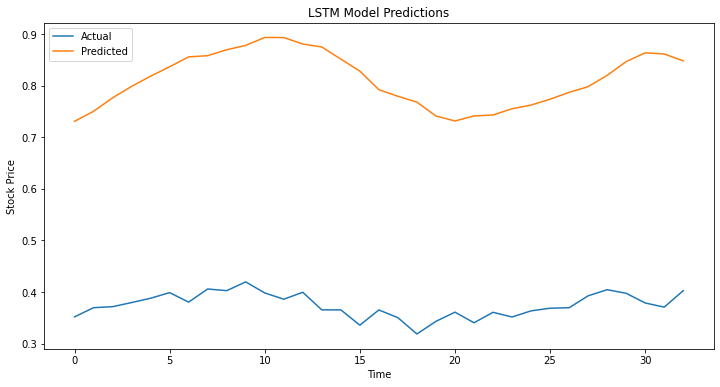

In [23]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming you have X_train, X_test, y_train, y_test already defined

# Reshape X_train and X_test to 2D
num_samples = X_train.shape[0]
num_timesteps = X_train.shape[1]
num_features = X_train.shape[2]

X_train_reshaped = X_train.reshape(num_samples * num_timesteps, num_features)
X_test_reshaped = X_test.reshape(X_test.shape[0] * X_test.shape[1], X_test.shape[2])

# Scale the features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_X.fit_transform(X_train_reshaped)
X_test_scaled = scaler_X.transform(X_test_reshaped)

# Reshape back to 3D
X_train_scaled = X_train_scaled.reshape(num_samples, num_timesteps, num_features)
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Scale the target variable y_train
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Build and train your LSTM model (as before)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(num_timesteps, num_features)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train_scaled, batch_size=1, epochs=10)

# Predict on the test data
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform predictions and y_test
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




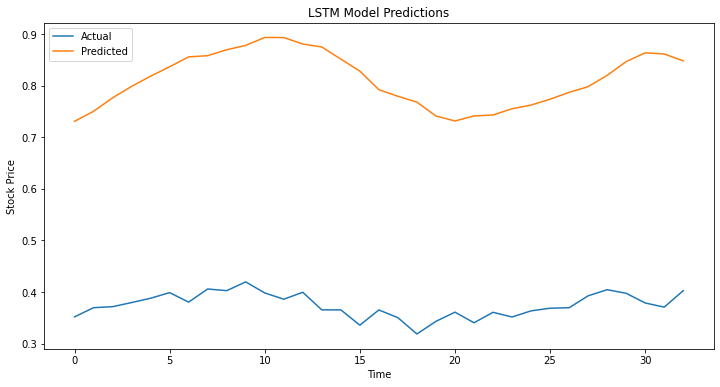

In [24]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
